<a href="https://colab.research.google.com/github/viniciused26/fastaiOnCampus/blob/main/nbs/lesson03_160147816_viniciused26_vinicius_edwardo_pereira_oliveira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autor
Vinicius Edwardo Pereira Oliveira - 160147816
GitHub: viniciused26

#Objetivo
Avaliar diferentes tipos de modelos quando aplicados a um dataset de tirinhas de cartunistas sul-americanos.

# 1º Passo: Bibliotecas e dados
Instalando as dependências necessárias e coletando os dados utilizados nos modelos.

In [19]:
!pip install duckduckgo_search timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from fastai.vision.all import *
from fastdownload import download_url


from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
# Termos que serão utilizados na busca.
searches = 'Tirinhas Laerte', 'Tirinhas Glauco', 'Tirinhas Angeli', 'Tirinhas Quino'
# O caminho da pasta que será gerada para armazenar
path = Path('tirinhas')
# Importando função sleep para não sobrecarregar o servidor
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}'))
    sleep(3)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'Tirinhas Laerte'
Searching for 'Tirinhas Glauco'
Searching for 'Tirinhas Angeli'
Searching for 'Tirinhas Quino'


# 2º Passo: Tratando os dados
Removendos os dados corrompidos que podem atrapalhar no treinamento dos modelos.

In [4]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

5

# 3º Passo: Treinamento
Criação dos datablocks utilizados nos modelos Resnets.

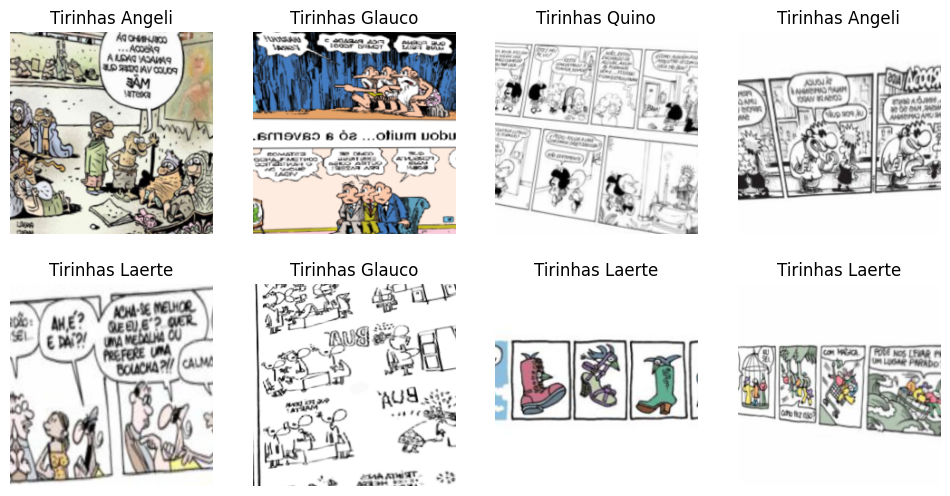

In [26]:
autor_tira = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = autor_tira.dataloaders(path)
dls.show_batch(max_n=8)

In [7]:
learnResnet50 = vision_learner(dls, resnet50, metrics = error_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 132MB/s]


### Resultados do modelo Resnet50

In [9]:
learnResnet50.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.756200,1.599174,0.636364,00:48


epoch,train_loss,valid_loss,error_rate,time
0,2.300463,1.505360,0.681818,00:58
1,2.190166,1.235222,0.545455,00:57
2,1.813358,0.980321,0.500000,00:56


### Matriz do modelo Resnet50

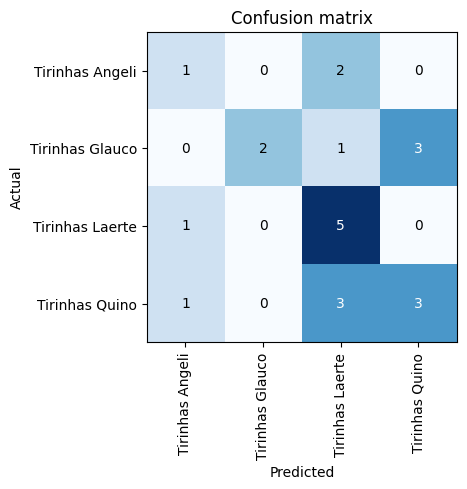

In [10]:
matrix = ClassificationInterpretation.from_learner(learnResnet50)
matrix.plot_confusion_matrix()

In [11]:
learnResnet34 = vision_learner(dls, resnet34, metrics = error_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 127MB/s]


### Resultados do modelo Resnet34

In [12]:
learnResnet34.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.194292,5.096480,0.727273,00:27


epoch,train_loss,valid_loss,error_rate,time
0,2.220142,3.773698,0.727273,00:38
1,2.181062,2.699066,0.727273,00:40
2,1.995520,2.065201,0.681818,00:39


### Resultados do modelo Resnet34

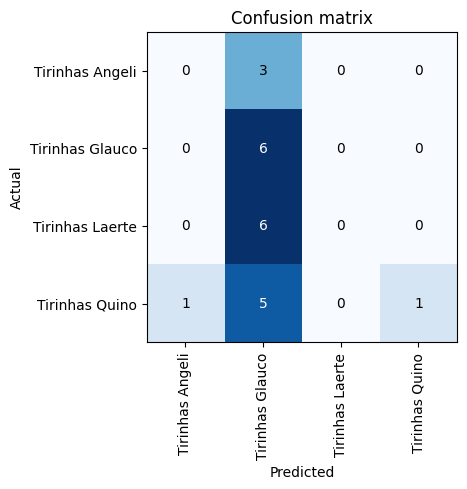

In [13]:
matrix = ClassificationInterpretation.from_learner(learnResnet34)
matrix.plot_confusion_matrix()

In [23]:
learnResnet18 = vision_learner(dls, resnet18, metrics = error_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 114MB/s]


### Resultados do modelo Resnet18

In [24]:
learnResnet18.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.219258,2.011859,0.681818,00:20


epoch,train_loss,valid_loss,error_rate,time
0,2.045149,1.917957,0.681818,00:24
1,1.999014,1.619730,0.590909,00:27
2,1.911526,1.526476,0.545455,00:34


### Matriz do modelo Resnet18

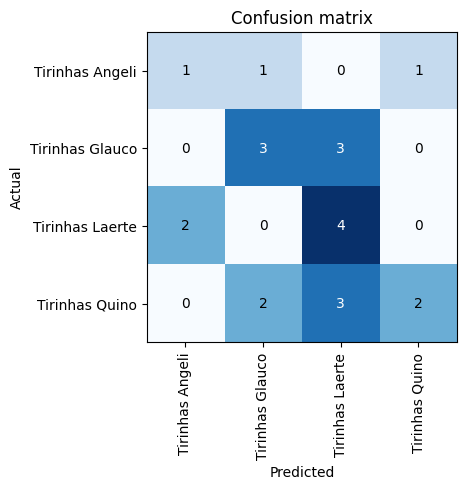

In [25]:
matrix = ClassificationInterpretation.from_learner(learnResnet18)
matrix.plot_confusion_matrix()

# Conclusão
Através dos resultados e avaliações das matrizes, percebemos que o modelo que obteve a menor taxa de erro foi o Resnet50, mas o Resnet18 atingiu um resultado próximo em um período de tempo menor, e por isso, foi determinado como o mais efetivo.